In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
import numpy as np
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
s = {
    'problem'           : "regression",
    'approach'          : "metric learning/non-parametric",
    'algorithm'         : "triplet network",
    'input'             : "samples from a distribution",
    'input type'        : "vectors",
    'input meaning'     : "spectrum", 
    'input dimension'   : 10000,
    'input channels'    : 1,
    'output'            : "samples from a distribution",
    'output type'       : "one number",
    'output meaning'    : "temperature or pressure, depending on distribution",
    'output dimension'  : 1,
    'learning rate'     : 1e-4,
    'feature dimension' : 300,
    'epoch'             : 1000,
    'epoch-development' : 1,
    'cross validation round': 16,
    'cross validation round-development' : 1,
    'batch size'        : 64,
    'number of convolution levels': 3,
    'best model folder' : 'triplet_best_model/'
}
import data_accessor as acc
datas = [
    'temperature_230509_discrete',
    'pressure_230516_discrete'
    ]
data_dictionary = acc.setup(datas)

loading temperature_230509_discrete__________________________
	input shape (number, dimension): (6000, 10000)
	label shape (number, dimension): (6000, 1)
	there are 16 folds
	4200 for training, 600 for validating, 1200 for testing
loading pressure_230516_discrete__________________________
	input shape (number, dimension): (5000, 10000)
	label shape (number, dimension): (5000, 1)
	there are 16 folds
	3500 for training, 500 for validating, 1000 for testing


__________CROSS VALIDATION__________
Cross-validation rounds: 16
Epochs: 1000
Datas to learn: 
	0: temperature_230509_discrete
	1: pressure_230516_discrete
SINGLE TASK____________________________
we're learning: temperature_230509_discrete
>round 0
EARLY STOPPING @ epoch 29
min train loss: 0.0013366711306540917
min valid loss: 0.0013188739423640073


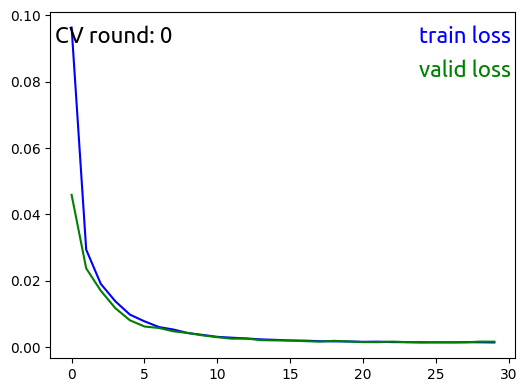

>round 1
EARLY STOPPING @ epoch 30
min train loss: 0.0014379341957850777
min valid loss: 0.0013383604818955064


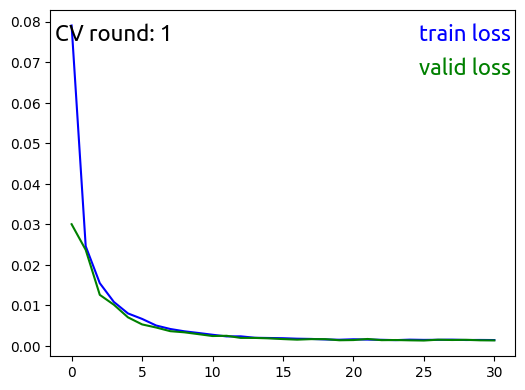

>round 2
EARLY STOPPING @ epoch 28
min train loss: 0.0008730025023617076
min valid loss: 0.0008523047668859363


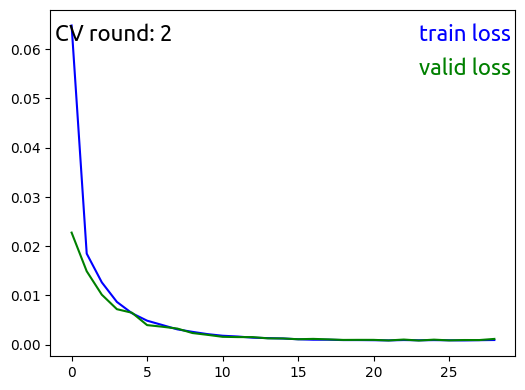

>round 3
EARLY STOPPING @ epoch 31
min train loss: 0.0017354589830519576
min valid loss: 0.0017448844038881362


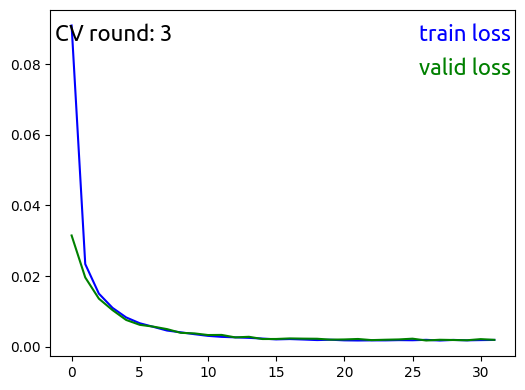

>round 4
EARLY STOPPING @ epoch 18
min train loss: 0.00037616158519857424
min valid loss: 0.00030656291492050516


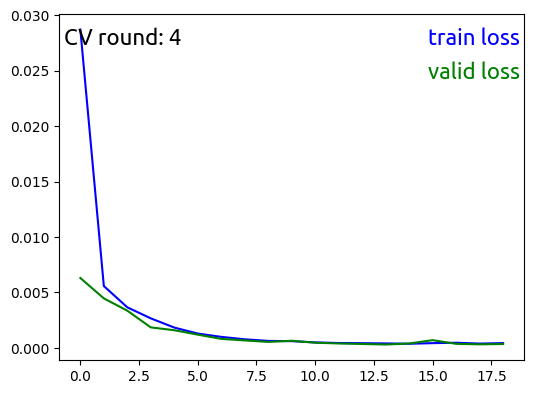

>round 5
EARLY STOPPING @ epoch 23
min train loss: 0.0007932560216762464
min valid loss: 0.0007706628879532218


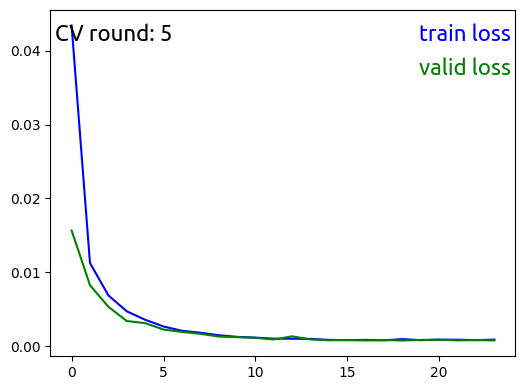

>round 6
EARLY STOPPING @ epoch 16
min train loss: 0.000118633752373915
min valid loss: 0.0001334276588750072


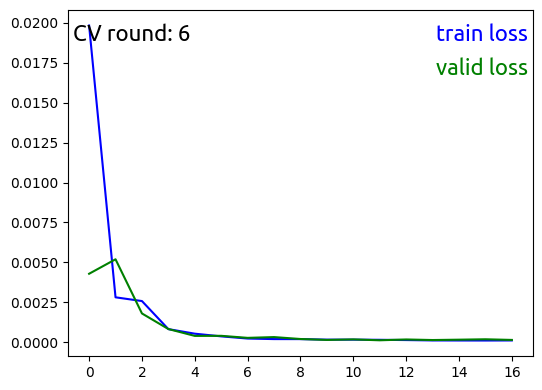

>round 7
EARLY STOPPING @ epoch 29
min train loss: 0.0002271565026603639
min valid loss: 0.0002549739045207389


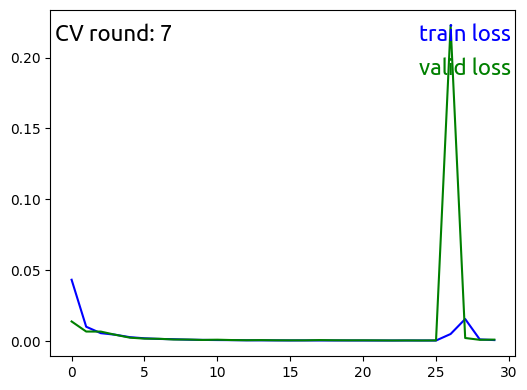

>round 8
EARLY STOPPING @ epoch 22
min train loss: 0.0005447207107808384
min valid loss: 0.0004659981786971912


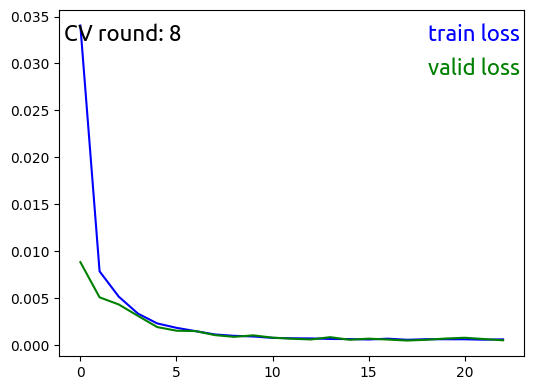

>round 9
EARLY STOPPING @ epoch 23
min train loss: 0.000588663481087706
min valid loss: 0.0005817169323563576


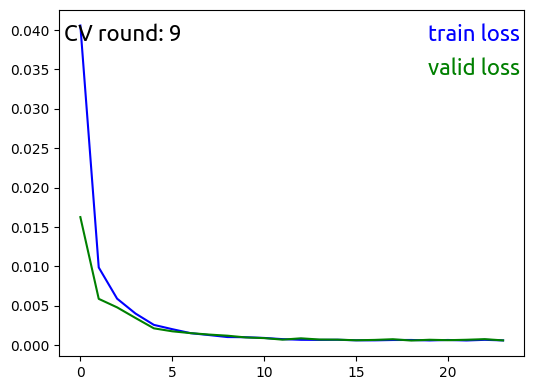

>round 10
EARLY STOPPING @ epoch 23
min train loss: 0.00020828608356885414
min valid loss: 0.00022122607188066468


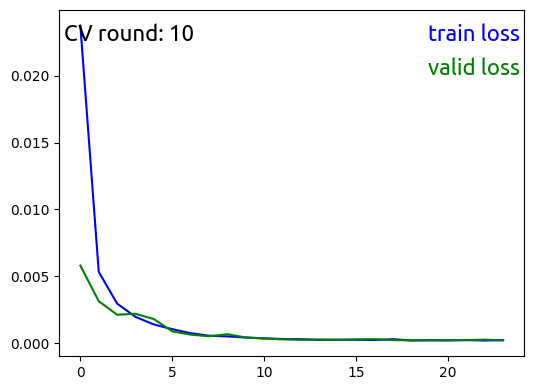

>round 11
EARLY STOPPING @ epoch 24
min train loss: 0.0005439695686976793
min valid loss: 0.0006862271140562371


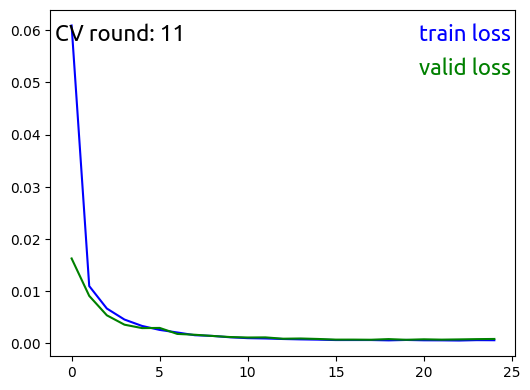

>round 12
EARLY STOPPING @ epoch 19
min train loss: 0.00012235674892673904
min valid loss: 0.00012368233874440193


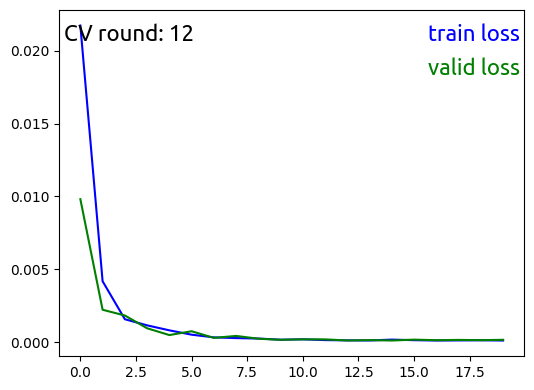

>round 13
EARLY STOPPING @ epoch 26
min train loss: 0.001169118786823343
min valid loss: 0.0010277105495333672


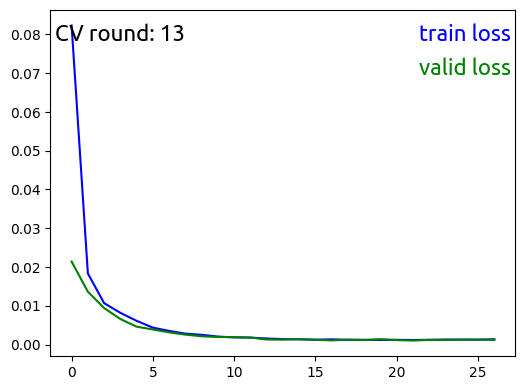

>round 14
EARLY STOPPING @ epoch 24
min train loss: 0.001138997810123714
min valid loss: 0.001092274027178064


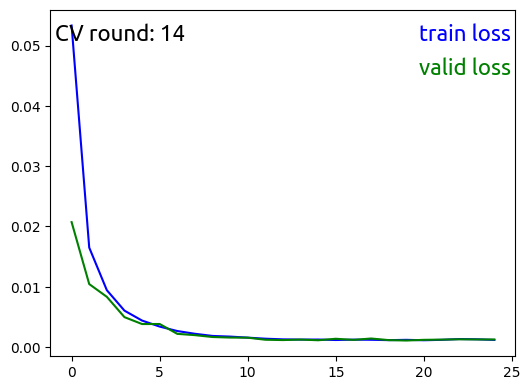

>round 15
EARLY STOPPING @ epoch 26
min train loss: 0.0013707936688495631
min valid loss: 0.0014046602533198892


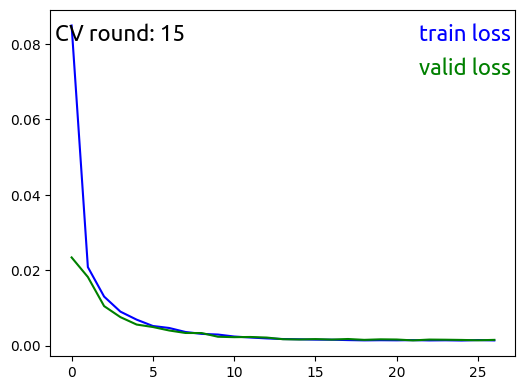

BEST model: CV=12.pth with 0.00012368233874440193
trained on temperature_230509_discrete
Aggregate performance: Valid loss mean 0.000770221651691827, std 0.0004933022337470918
😇 TRAINing COMPLETE____________________________
TEST____________________________
Testing temperature_230509_discrete, loss:  0.00010096242342689565
Testing pressure_230516_discrete, loss:  3.95011667907238


In [6]:
from CrossValidation import CrossValidator
from tools import SaveBestCrossValidationModel
from Triplet_TCN import TripletAux_and_TCNDataset, TripletAux_and_TCNManager
from data import alternate_rows_itertools
# datas.reverse()
CVtor = CrossValidator(s['cross validation round'], 
                       s['epoch'], 
                       SaveBestCrossValidationModel(s['best model folder']), 
                       TripletAux_and_TCNDataset,
                       datas,
                       data_dictionary,
                       TripletAux_and_TCNManager,
                       s,
                       device)
CVtor.single_task_train(0)
# CVtor.multi_task_train_sequential()
# CVtor.multi_task_train_weave(alternate_rows_itertools) 
CVtor.complete_notify()
CVtor.test_all()